In [1]:
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer 

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
   
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


In [2]:
!pip install datasets

In [3]:
from datasets import load_dataset

emotion_dataset = load_dataset("emotion")

Using custom data configuration default
Reusing dataset emotion (C:\Users\valsa\.cache\huggingface\datasets\emotion\default\0.0.0\348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [6]:
emotion_dataset.set_format(type="pandas")
df1 = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]

In [7]:
df1 = df1.rename(columns={'text':'sentence','label':'emotion'})

In [8]:
df1.head()

,sentence,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
df1 = df1[["emotion", "sentence"]]

In [10]:
df1.head()

,emotion,sentence
0,0,i didnt feel humiliated
1,0,i can go from feeling so hopeless to so damned...
2,3,im grabbing a minute to post i feel greedy wrong
3,2,i am ever feeling nostalgic about the fireplac...
4,3,i am feeling grouchy


In [11]:
df1 = df1.replace([0,1,2,3,4,5],['sadness','joy','love','surprise','anger','fear'])
df1.head()

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,surprise,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,surprise,i am feeling grouchy


In [12]:
df2 = pd.read_csv('G:\My Drive\AnjanaValsalan_ECNG 3020\Implementation Files\ISEAR csv\ISEAR.csv')

In [13]:
df2.head()

,emotion,sentence,Unnamed: 2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [14]:
df2.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)

In [15]:
df2.head()

,emotion,sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [16]:
frames = [df1, df2]

In [17]:
df = pd.concat(frames)

In [18]:
df.reset_index(drop=True)

,emotion,sentence
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,surprise,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,surprise,i am feeling grouchy
...,...,...
23511,shame,Two years back someone invited me to be the tu...
23512,shame,I had taken the responsibility to do something...
23513,fear,I was at home and I heard a loud sound of spit...
23514,guilt,I did not do the homework that the teacher had...


In [19]:
train_size=0.8

text = df.drop(columns = ['emotion']).copy()
label = df['emotion']

text_train, text_rem, label_train, label_rem = train_test_split(text,label, train_size=0.8)

test_size = 0.5
text_valid, text_test, label_valid, label_test = train_test_split(text_rem,label_rem,test_size=0.5)

print(text_train.shape), print(label_train.shape)
print(text_valid.shape), print(label_valid.shape)
print(text_test.shape), print(label_test.shape)

(18812, 1)
(18812,)
(2352, 1)
(2352,)
(2352, 1)
(2352,)


(None, None)

In [20]:
text_test

,sentence
50,i need to feel the dough to make sure its just...
13665,i persevered and km later im feeling pretty smug
14081,i feel like were all pretty supportive of each...
12955,i feel blessed to be his sister
14984,i tried it naked gardening and it feels lovely...
...,...
7259,When I learnt that I had been admitted to the ...
1472,When I was house-hunting: Another person got a...
5964,i feel like im taking up some more needy perso...
4635,i heard a song on the radio yesterday that jus...


In [21]:
text_train_list=[ i[0] for i in text_train.values.tolist()]

In [22]:
tokenizer = Tokenizer(num_words=1000000, oov_token='<UNK>')
tokenizer.fit_on_texts([text_train_list[1]])

In [23]:
tokenizer.texts_to_sequences([text_train_list[1]])

[[3, 2, 4, 5, 6, 7, 8, 9, 10, 11, 2, 12]]

In [24]:
text_train_list[1]

'They had returned much less of my taxes than I had expected.'

<function matplotlib.pyplot.show(close=None, block=None)>

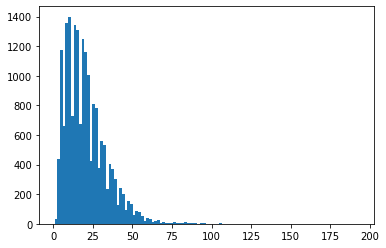

In [25]:
lengths = [len(t.split(' ')) for t in text_train_list]
plt.hist(lengths, bins = len(set(lengths)))
plt.show

In [26]:
max_length = 200
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
def get_sequences(tokenizer, text_train_list):
    sequences = tokenizer.texts_to_sequences(text_train_list)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen = max_length)
    return padded

In [28]:
padded_train_seq = get_sequences(tokenizer,text_train_list)

In [29]:
padded_train_seq

array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 3,  2,  4, ...,  0,  0,  0],
       [11,  1,  1, ...,  0,  0,  0],
       ...,
       [11,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  7, ...,  0,  0,  0],
       [11,  1,  1, ...,  0,  0,  0]])

In [30]:
classes = set(label_train)
print(classes)

{'fear', 'shame', 'sadness', 'surprise', 'joy', 'disgust', 'anger', 'guilt', 'love'}


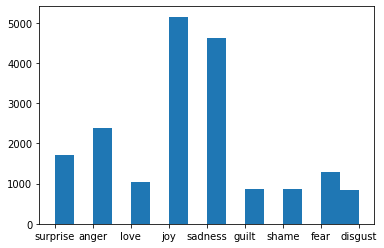

In [31]:
plt.hist(label_train, bins=16)
plt.show()

In [32]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [33]:
class_to_index

{'fear': 0,
 'shame': 1,
 'sadness': 2,
 'surprise': 3,
 'joy': 4,
 'disgust': 5,
 'anger': 6,
 'guilt': 7,
 'love': 8}

In [34]:
index_to_class

{0: 'fear',
 1: 'shame',
 2: 'sadness',
 3: 'surprise',
 4: 'joy',
 5: 'disgust',
 6: 'anger',
 7: 'guilt',
 8: 'love'}

In [35]:
names_to_ids = lambda label_train: np.array([class_to_index.get(x) for x in label_train])

In [36]:
train_labels = names_to_ids(label_train)
print(train_labels[0])

3


In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(23516, 16, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(9, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = optimizer,
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 16)           376256    
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 40)          5920      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 9)                 369       
                                                                 
Total params: 392,305
Trainable params: 392,305
Non-trainable params: 0
_________________________________________________________________


In [49]:
text_valid_list=[ i[0] for i in text_valid.values.tolist()]

In [50]:
text_val_seq = get_sequences(tokenizer, text_valid_list)

In [51]:
text_val_seq

array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [11,  1,  1, ...,  0,  0,  0],
       ...,
       [ 1, 11,  1, ...,  0,  0,  0],
       [11,  1,  1, ...,  0,  0,  0],
       [11,  1,  1, ...,  0,  0,  0]])

In [52]:
train_labels

array([3, 6, 8, ..., 2, 2, 4])

In [53]:
label_valid = names_to_ids(label_valid)

In [54]:
label_valid

array([None, None, None, ..., None, None, None], dtype=object)

In [55]:
h = model.fit(
padded_train_seq, train_labels,
validation_data=(text_val_seq, label_valid),
epochs=25,
callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 5)
])

Epoch 1/25
588/588 [==============================] - ETA: 0s - loss: 1.9508 - accuracy: 0.2711

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).

In [ ]:
show_history(h)